In [1]:
import colorednoise
import matplotlib.pyplot as plt
# from utils import *
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import os
from cds_utils import loudness_normalize
%matplotlib inline

In [2]:
def mix_db(x,y,db):
    E_x = np.mean(x**2)
    E_y = np.mean(y**2)
    
    a = E_x/(E_y*(10**(db/10)))
    lam = 1/(1+a)
    return lam*x+(1-lam)*y

In [3]:
[x,egg],sr = librosa.load('/workspace/SpeechToEGG/datasets/TrainData/CMU/bdl_arctic_a0001.wav',sr=16000,mono=False)
[y,egg_2],sr = librosa.load('/workspace/SpeechToEGG/datasets/TestData/saarbrucken/1196-a_lhl.wav',sr=16000,mono=False)

In [161]:
music,sr = librosa.load('/workspace/SpeechToEGG/datasets/TrainData/musical_noise/other_96.wav',sr=16000)
babble,sr = librosa.load('/workspace/SpeechToEGG/datasets/TrainData/normal_noise/babble.wav',sr=16000)

(257, 63)


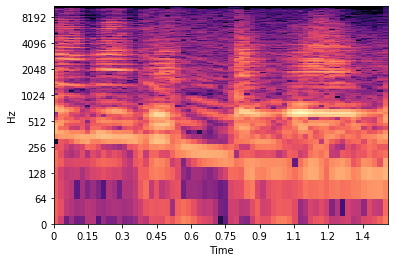

In [162]:
stft = np.abs(librosa.core.stft(np.asfortranarray(music[28000:36000]),n_fft=512,hop_length=128))
print(stft.shape)
librosa.display.specshow(librosa.amplitude_to_db(stft,ref=np.max),y_axis='log', x_axis='time')

(257, 63)


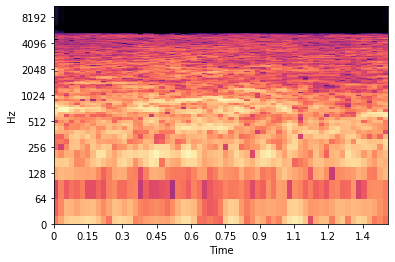

In [163]:
stft = np.abs(librosa.core.stft(np.asfortranarray(babble[28000:36000]),n_fft=512,hop_length=128))
print(stft.shape)
librosa.display.specshow(librosa.amplitude_to_db(stft,ref=np.max),y_axis='log', x_axis='time')

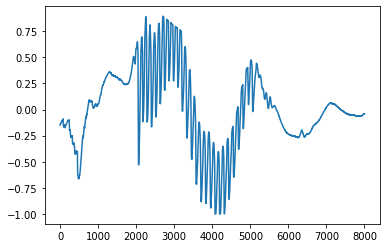

In [164]:
plt.plot(egg[28000:36000])

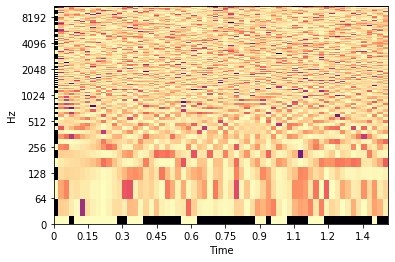

In [196]:
stft = librosa.core.stft(np.asfortranarray(loudness_normalize(x[4000:12000])),n_fft=512,hop_length=128)
stft_mag = np.abs(stft)
stft_phase = np.angle(stft)
librosa.display.specshow(librosa.amplitude_to_db(stft_phase,ref=np.max),y_axis='log', x_axis='time')

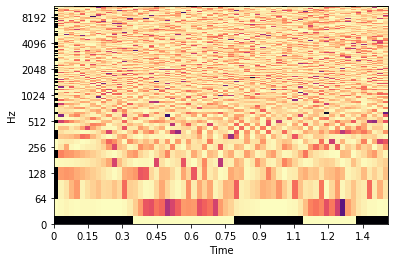

In [205]:
stft = librosa.core.stft(np.asfortranarray(loudness_normalize(egg[4000:12000])),n_fft=512,hop_length=128)
stft_mag = np.abs(stft)
stft_phase = np.angle(stft)
librosa.display.specshow(librosa.amplitude_to_db(stft_phase,ref=np.max),y_axis='log', x_axis='time')

In [208]:
stft_mag.max()

118.721115

In [206]:
np.power(10,np.log10(1+stft_mag)).max()

119.72112

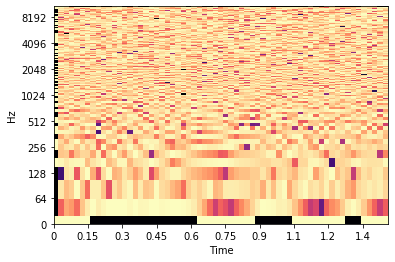

In [128]:
librosa.display.specshow(librosa.amplitude_to_db(stft_phase,ref=np.max),y_axis='log', x_axis='time')

In [131]:
stft_recon = stft_mag*(np.cos(stft_phase)+1j*np.sin(stft_phase))

In [132]:
stft_recon_egg_recon = librosa.core.istft(stft_recon, hop_length=128, win_length=512,length=8000)

In [37]:
stft = librosa.core.stft(np.asfortranarray(egg[28000:36000]),n_fft=512,hop_length=128)
magnitude = np.abs(stft)
griffin_egg_recon = librosa.core.griffinlim(magnitude,n_iter=200,hop_length=128,win_length=512,length=8000)

In [33]:
stft = librosa.core.stft(np.asfortranarray(egg[28000:36000]),n_fft=512,hop_length=128)
egg_recon = librosa.core.istft(stft, hop_length=128, win_length=512,length=8000)

In [53]:
stft = librosa.core.stft(np.asfortranarray(egg[28000:36000]),n_fft=512,hop_length=128)
mag_egg_recon = librosa.core.istft(np.abs(stft),hop_length=128, win_length=512,length=8000)

In [ ]:
np.nan*0

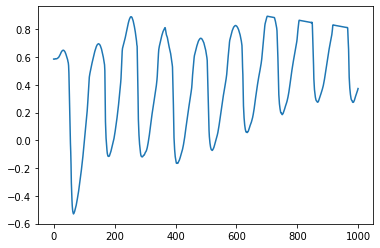

In [58]:
plt.plot(egg[28000:36000][2000:3000])

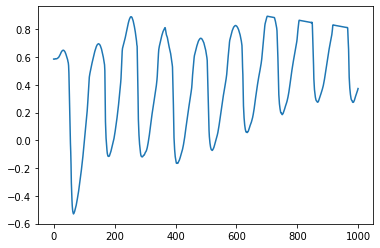

In [57]:
plt.plot(egg_recon[2000:3000])

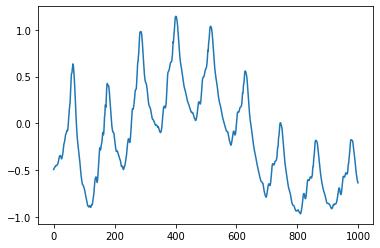

In [56]:
plt.plot(griffin_egg_recon[2000:3000])

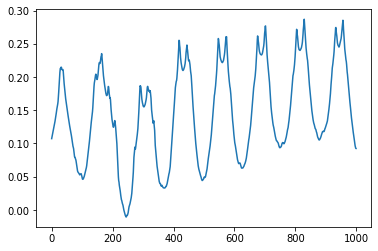

In [97]:
plt.plot(mag_egg_recon[2000:3000])

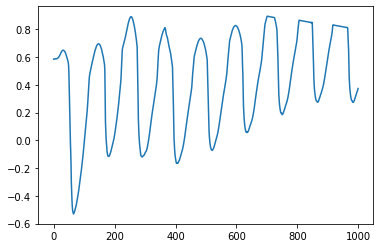

In [134]:
plt.plot(stft_recon_egg_recon[2000:3000])

In [10]:
from stft_utils.stft import STFT
import torch

In [11]:
n_fft = 512
hop_length = 128

In [12]:
stft = STFT(filter_length = n_fft, hop_length = hop_length,window='hann').cuda()

In [13]:
data = egg[:4000]

In [14]:
mag,phase=stft.transform(torch.Tensor([data]).cuda())

In [16]:
y = stft.inverse(mag,phase)

recombine : torch.float32
inverse transform : torch.float32


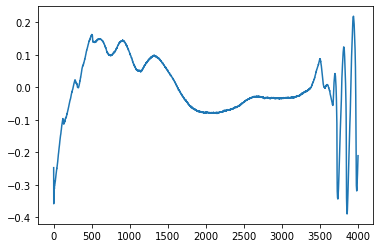

In [26]:
plt.plot(data)

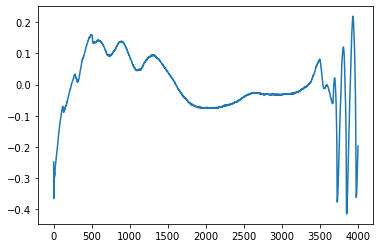

In [35]:
plt.plot(y.cpu().detach().numpy()[0])

In [39]:
x = torch.HalfTensor([0])

In [40]:
y = torch.FloatTensor([0])

In [8]:
from stft_utils.stft import STFT
import torch

In [9]:
mag,phase=stft.transform(torch.Tensor([data]).cuda())

NameError: name 'data' is not defined

In [56]:
y = stft.inverse(mag,phase)